In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')
df.head().transpose()

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [3]:
df.shape

(41188, 21)

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

### Continuous Feature Analysis

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

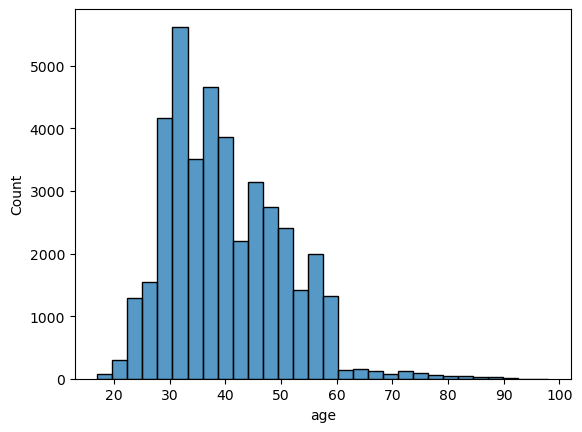

In [5]:
sns.histplot(data=df,x='age',bins=30)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

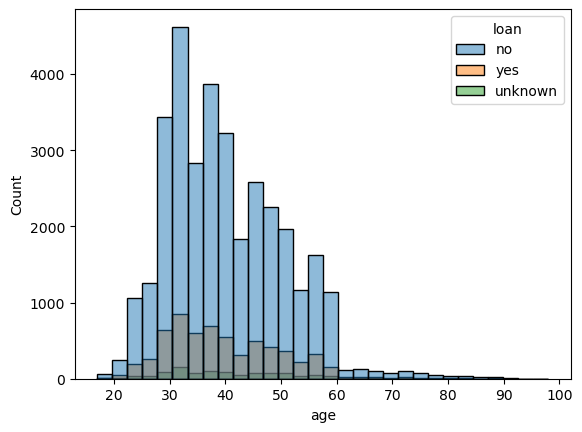

In [6]:
sns.histplot(data=df,x='age',hue='loan',bins=30)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

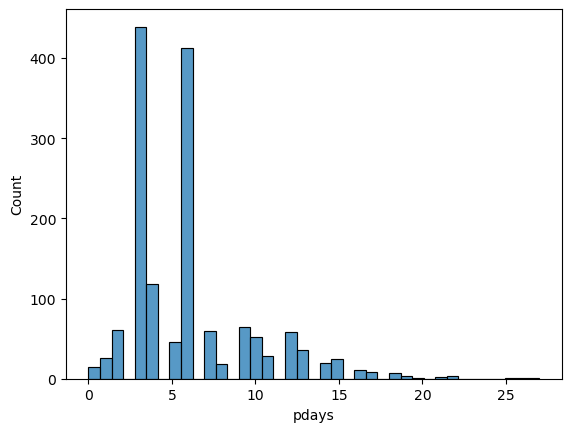

In [7]:
sns.histplot(data=df[df['pdays']!=999],x='pdays')

In [8]:
len(df[df['pdays']!=999])

1515

In [9]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [10]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 1500.0)

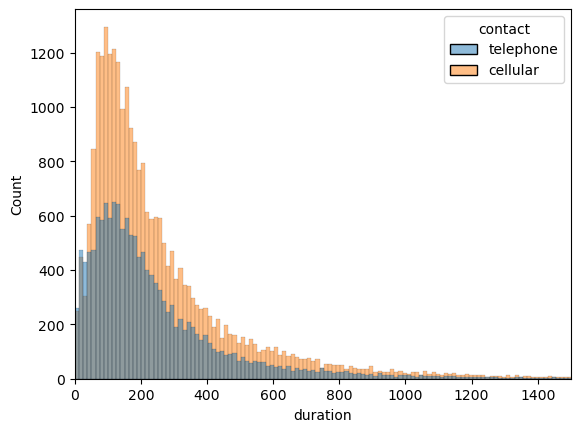

In [11]:
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1500)

<Axes: xlabel='previous', ylabel='count'>

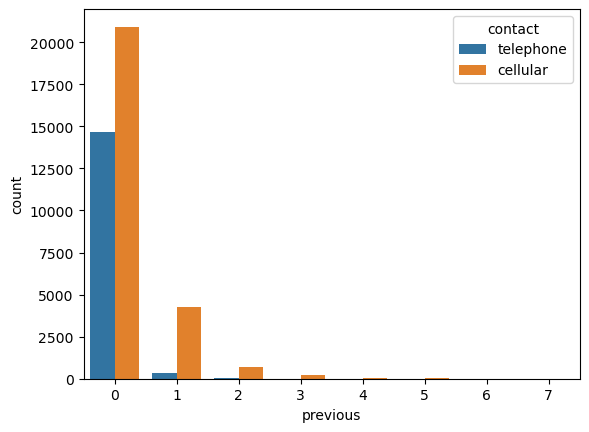

In [12]:
sns.countplot(data=df,x='previous',hue='contact')

In [13]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

### Categorical Features

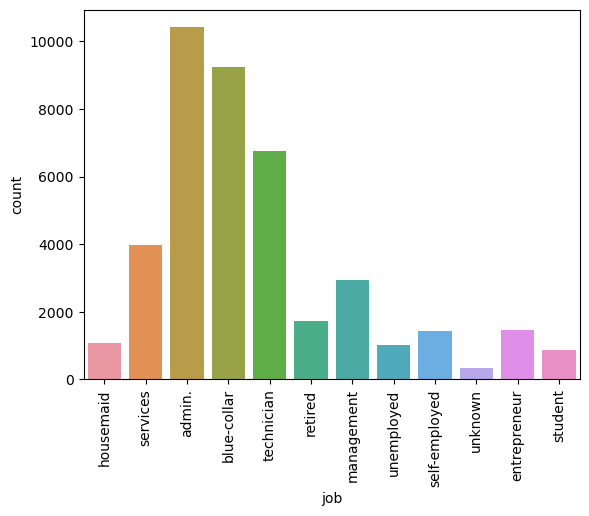

In [14]:
sns.countplot(data=df,x='job')
plt.xticks(rotation=90)
plt.show()

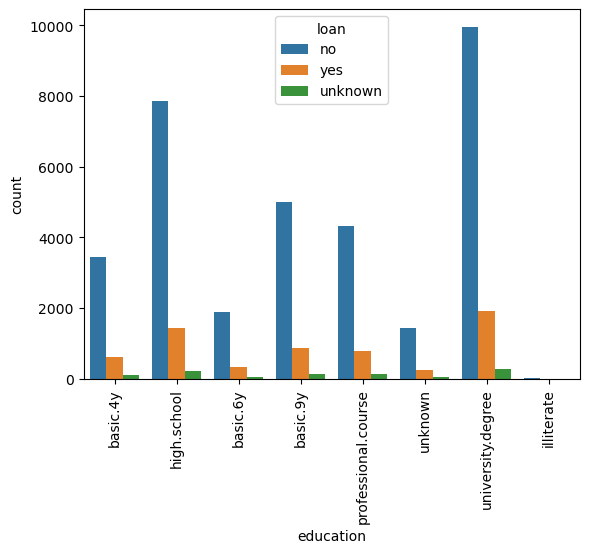

In [15]:
sns.countplot(data=df,x='education',hue='loan')
plt.xticks(rotation=90)
plt.show()

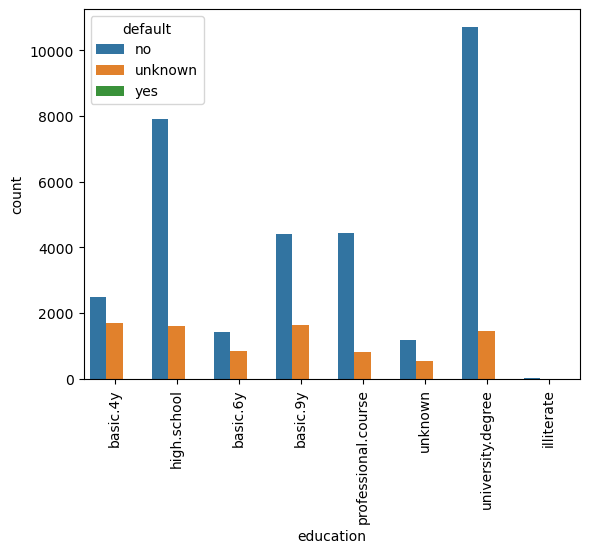

In [16]:
sns.countplot(data=df,x='education',hue='default')
plt.xticks(rotation=90)
plt.show()

### Building the Model

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
X = pd.get_dummies(df)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [20]:
sc_X = sc.fit_transform(X)

In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

In [22]:
cluster_labels = model.fit_predict(sc_X)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [24]:
len(cluster_labels)

41188

In [25]:
X['Cluster'] = cluster_labels

In [26]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1


<Axes: >

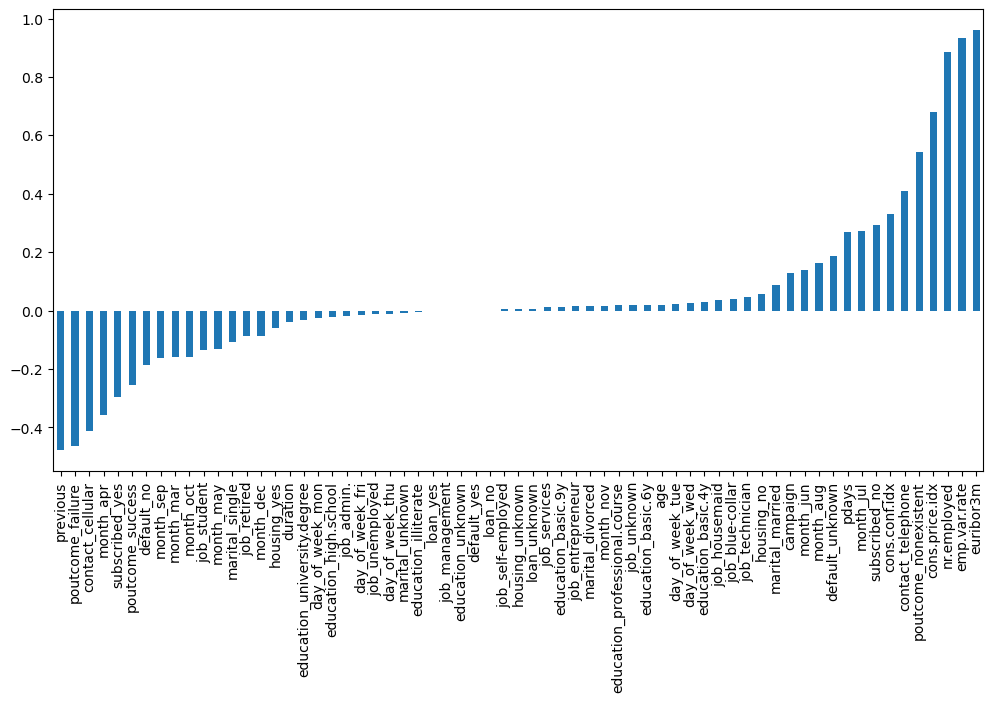

In [27]:
plt.figure(figsize=(12,6))
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [28]:
model.inertia_

2469792.361662754

### Choosing K value

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
ssd = []

for k in range(2,20):
    mod = KMeans(n_clusters=k)
    mod.fit(sc_X)
    
    ssd.append(mod.inertia_)

Text(0, 0.5, 'SSD')

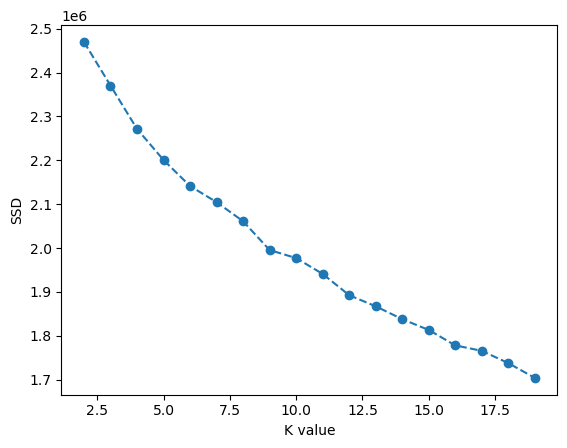

In [31]:
plt.plot(range(2,20), ssd, 'o--')
plt.xlabel('K value')
plt.ylabel('SSD')

<Axes: >

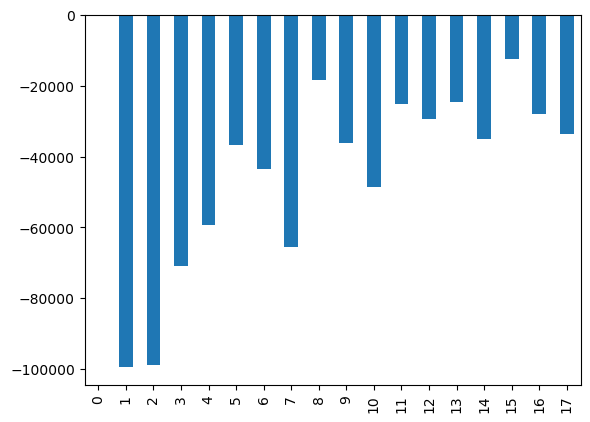

In [32]:
pd.Series(ssd).diff().plot(kind = 'bar')